# Supervised learning Model

## Preparing Data

In [1]:
import pandas as pd

imune_df = pd.read_csv("../raw_data/CIBERSORTx_Job7_Results.txt",sep='\t')
imune_df.head()

,Mixture,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.136607,0.000000,0.008096,0.0,0.045574,0.0,0.119292,0.024,0.167135,1.012925
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.142035,0.003342,0.000000,0.0,0.171013,0.0,0.022019,0.030,0.161424,1.018143
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.066831,0.000000,0.000000,0.0,0.140387,0.0,0.111967,0.048,0.148986,1.029813
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.019745,0.071104,0.000000,0.0,0.188876,0.0,0.074924,0.004,0.250437,0.986058
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.065631,0.000000,0.009239,0.0,0.134230,0.0,0.070198,0.024,0.169331,1.020998


In [2]:
#! pip install pyreadstat
import pyreadstat

clinical_df, meta = pyreadstat.read_sav("../raw_data/FIRE3_Heike_set_new.sav")
imune_df.head()

,Mixture,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.136607,0.000000,0.008096,0.0,0.045574,0.0,0.119292,0.024,0.167135,1.012925
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.142035,0.003342,0.000000,0.0,0.171013,0.0,0.022019,0.030,0.161424,1.018143
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.066831,0.000000,0.000000,0.0,0.140387,0.0,0.111967,0.048,0.148986,1.029813
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.019745,0.071104,0.000000,0.0,0.188876,0.0,0.074924,0.004,0.250437,0.986058
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.065631,0.000000,0.009239,0.0,0.134230,0.0,0.070198,0.024,0.169331,1.020998


In [3]:
imune_df.shape

(451, 26)

In [4]:
clinical_df.head()

,study,pat_nr,CET1_REST0,arm,sex,age,ecog,skin_rash,MOL_SG,RNA_Probe,...,orr1,dpr1,ets_cat,SYNCH_META,PRIMARY_RES,RADIOVORHER,LK,AP,CTX_ADJ,filter_$
0,FIRE 3,1.0,0.0,2.0,2.0,60.0,0.0,0.0,3.0,1.0,...,1.0,NaN,NaN,2.0,1.0,1.0,2.0,1.0,1.0,1.0
1,FIRE 3,2.0,1.0,1.0,2.0,52.0,1.0,0.0,NaN,0.0,...,0.0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,FIRE 3,3.0,1.0,1.0,2.0,52.0,1.0,0.0,NaN,0.0,...,1.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0,0.0
3,FIRE 3,4.0,0.0,2.0,1.0,58.0,0.0,0.0,3.0,1.0,...,1.0,NaN,0.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0
4,FIRE 3,5.0,0.0,2.0,2.0,54.0,0.0,0.0,1.0,1.0,...,1.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0


In [5]:
imune_df = imune_df.rename({'Mixture': 'pat_nr'}, axis='columns')
imune_df.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.136607,0.000000,0.008096,0.0,0.045574,0.0,0.119292,0.024,0.167135,1.012925
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.142035,0.003342,0.000000,0.0,0.171013,0.0,0.022019,0.030,0.161424,1.018143
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.066831,0.000000,0.000000,0.0,0.140387,0.0,0.111967,0.048,0.148986,1.029813
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.019745,0.071104,0.000000,0.0,0.188876,0.0,0.074924,0.004,0.250437,0.986058
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.065631,0.000000,0.009239,0.0,0.134230,0.0,0.070198,0.024,0.169331,1.020998


In [6]:
clinical_df.shape

(735, 37)

In [7]:
clinical_df["pat_nr"]=clinical_df["pat_nr"].astype('int64')
clinical_df.pat_nr.dtype

dtype('int64')

In [8]:
clinical_df.head(30)
clinical2=clinical_df[["pat_nr","skin_rash"]]
clinical2

,pat_nr,skin_rash
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
730,896,0.0
731,897,0.0
732,898,0.0
733,899,0.0


In [109]:
clinical2

,pat_nr,skin_rash
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
730,896,0.0
731,897,0.0
732,898,0.0
733,899,0.0


In [9]:
cdf=imune_df.merge(clinical2, how='inner', on='pat_nr')
cdf.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE,skin_rash
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.000000,0.008096,0.0,0.045574,0.0,0.119292,0.024,0.167135,1.012925,0.0
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.003342,0.000000,0.0,0.171013,0.0,0.022019,0.030,0.161424,1.018143,0.0
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.000000,0.000000,0.0,0.140387,0.0,0.111967,0.048,0.148986,1.029813,0.0
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.071104,0.000000,0.0,0.188876,0.0,0.074924,0.004,0.250437,0.986058,1.0
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.000000,0.009239,0.0,0.134230,0.0,0.070198,0.024,0.169331,1.020998,1.0


In [10]:
cdf.shape

(442, 27)

## Initiating Supervised Model

In [11]:
X=cdf.drop(columns=["pat_nr","P-value","Correlation","RMSE","skin_rash"])
y=cdf["skin_rash"]

<AxesSubplot:>

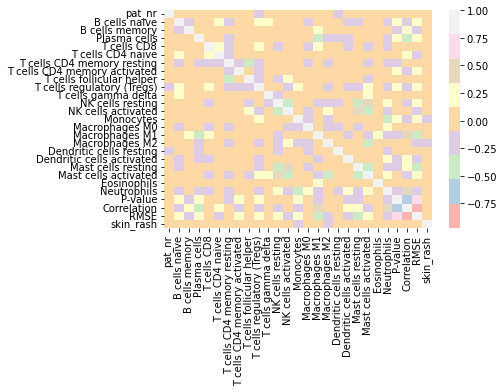

In [12]:
import seaborn as sns

# Heatmap
corr = cdf.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "Pastel1")

### LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

model = LogisticRegression(class_weight='balanced')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25, 
                                                    random_state = 6) # Holdout

In [14]:
cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.016355,0.003925,0.558824,0.444444,0.285714,0.347826
1,0.004052,0.004183,0.636364,0.500000,0.333333,0.400000
2,0.004300,0.003419,0.545455,0.625000,0.294118,0.400000
3,0.004519,0.003434,0.545455,0.250000,0.181818,0.210526
4,0.004333,0.003447,0.666667,0.625000,0.384615,0.476190
5,0.004394,0.003400,0.363636,0.375000,0.157895,0.222222
6,0.006580,0.003378,0.575758,0.750000,0.333333,0.461538
7,0.004449,0.003386,0.484848,0.375000,0.200000,0.260870
8,0.004674,0.003507,0.727273,0.875000,0.466667,0.608696
9,0.003888,0.003205,0.545455,0.555556,0.312500,0.400000


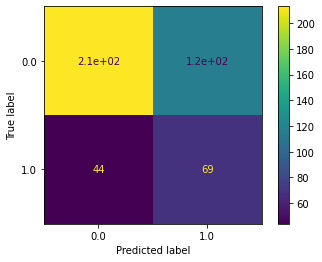

In [15]:
from sklearn.metrics import plot_confusion_matrix
model=model.fit(X,y)
plot_confusion_matrix(model,X,y)

In [16]:
y.value_counts()

0.0    329
1.0    113
Name: skin_rash, dtype: int64

### KNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
cv_results = cross_validate(model2, X_train, y_train, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

/home/alexandrumalina/.pyenv/versions/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandrumalina/.pyenv/versions/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.001651,0.009908,0.735294,0.000000,0.000000,0.000000
1,0.002705,0.007279,0.757576,0.000000,0.000000,0.000000
2,0.001578,0.005011,0.727273,0.250000,0.400000,0.307692
3,0.001394,0.006155,0.727273,0.125000,0.333333,0.181818
4,0.002120,0.005593,0.666667,0.250000,0.285714,0.266667
5,0.001568,0.005183,0.727273,0.125000,0.333333,0.181818
6,0.001446,0.006867,0.727273,0.250000,0.400000,0.307692
7,0.004402,0.008079,0.757576,0.125000,0.500000,0.200000
8,0.001594,0.005143,0.696970,0.250000,0.333333,0.285714
9,0.001397,0.006122,0.696970,0.111111,0.333333,0.166667


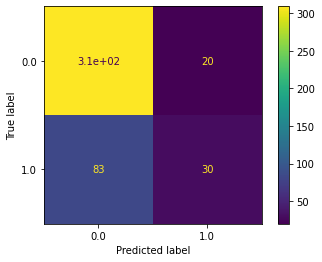

In [18]:
plot_confusion_matrix(model2,X,y)

### SGDClassifier

In [19]:
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

model3 = SGDClassifier(class_weight='balanced')


model3.fit(X_test,y_test)
cv_results = cross_validate(model3, X_test, y_test, cv=10, scoring=['precision'])

#simplified_model_score = cv_results['test_score'].mean()
cv_results

/home/alexandrumalina/.pyenv/versions/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandrumalina/.pyenv/versions/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.00392056, 0.00168967, 0.00201559, 0.00173783, 0.00146198,
        0.00157404, 0.00163651, 0.00161123, 0.00249171, 0.00294614]),
 'score_time': array([0.00225282, 0.00154471, 0.00246286, 0.00146508, 0.00144148,
        0.00155306, 0.00144458, 0.00142145, 0.00289512, 0.00173736]),
 'test_precision': array([0.5       , 0.27272727, 0.27272727, 0.27272727, 0.        ,
        0.25      , 0.28571429, 0.27272727, 0.        , 0.        ])}

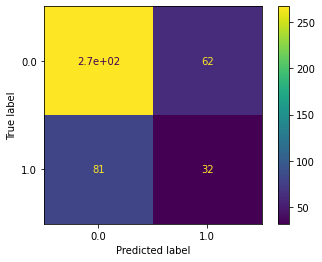

In [20]:
plot_confusion_matrix(model3,X,y)

### Best Model so far

In [21]:
best="KNeighbors"

In [22]:
model4 = KNeighborsClassifier(n_neighbors=20)
model4.fit(X_train,y_train)
cv_results = cross_validate(model4, X_train, y_train, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

/home/alexandrumalina/.pyenv/versions/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandrumalina/.pyenv/versions/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandrumalina/.pyenv/versions/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandrumalina/.py

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.002721,0.006858,0.735294,0.000,0.0,0.000000
1,0.003199,0.005684,0.727273,0.000,0.0,0.000000
2,0.001713,0.005312,0.727273,0.000,0.0,0.000000
3,0.001442,0.008111,0.757576,0.000,0.0,0.000000
4,0.001669,0.005354,0.787879,0.125,1.0,0.222222
5,0.001436,0.006646,0.757576,0.000,0.0,0.000000
6,0.003965,0.006294,0.757576,0.000,0.0,0.000000
7,0.001749,0.006702,0.757576,0.000,0.0,0.000000
8,0.001761,0.006047,0.757576,0.000,0.0,0.000000
9,0.001580,0.005697,0.727273,0.000,0.0,0.000000


In [23]:
from sklearn.model_selection import GridSearchCV
model5 = KNeighborsClassifier()
k_grid={"n_neighbors":[5,20,21,22,23,24],'p': [1, 2, 3,4,5]}
 
search = GridSearchCV(model5, k_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 
search.fit(X_train,y_train);
search.best_params_

{'n_neighbors': 22, 'p': 1}

In [24]:
model6=KNeighborsClassifier(n_neighbors=22,p=1)
cv_results=cross_validate(model6,X_train,y_train,cv=5)
cv_results['test_score'].mean()

0.7553143374038896

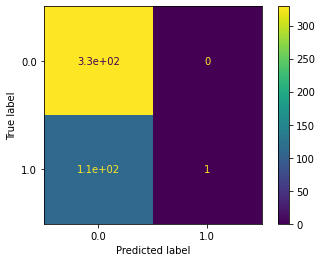

In [25]:
model6.fit(X_train,y_train)
plot_confusion_matrix(model6,X,y)

## KNeighbors on Cetuximab(good arm)

In [84]:
#Read Cetux data and define X and Y
cetux = pd.read_csv("../raw_data/cetux.csv")
X_cet=cetux.drop(columns=["skin_rash","age"])
y_cet=cetux["skin_rash"]

#Split the train and test data
X_train_cet, X_test_cet, y_train_cet, y_test_cet = train_test_split(X_cet, y_cet,
                                                    test_size = 0.25, 
                                                    random_state = 6) # Holdout



In [86]:
X_cet.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,sex
0,9,0.067346,0.000000,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.061996,0.019745,0.071104,0.000000,0.0,0.188876,0.000000,0.074924,0.004,1.0
1,10,0.000000,0.000000,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.000000,0.065631,0.000000,0.009239,0.0,0.134230,0.000000,0.070198,0.024,1.0
2,12,0.065798,0.000000,0.118399,0.111458,0.0,0.281396,0.000000,0.000000,0.069544,...,0.121340,0.005364,0.024802,0.000000,0.0,0.086495,0.032828,0.051155,0.002,1.0
3,15,0.010223,0.000000,0.186072,0.193724,0.0,0.283032,0.000000,0.000000,0.144012,...,0.018321,0.014802,0.000000,0.000000,0.0,0.081489,0.000000,0.004522,0.034,1.0
4,16,0.000000,0.013582,0.056297,0.080645,0.0,0.336947,0.000000,0.035983,0.057663,...,0.000000,0.167292,0.079572,0.010232,0.0,0.045427,0.000000,0.095906,0.022,1.0


In [87]:
from sklearn.model_selection import GridSearchCV
model5 = KNeighborsClassifier()
k_grid={"n_neighbors":[2,3,4,5,6,7,10],'p': [1, 2, 3,4,5]}
 
search = GridSearchCV(model5, k_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 
search.fit(X_train_cet,y_train_cet);
search.best_params_

{'n_neighbors': 2, 'p': 2}

In [90]:
model7=KNeighborsClassifier(n_neighbors=2,p=2)
cv_results=cross_validate(model6,X_train_cet,y_train_cet,cv=10)
cv_results['test_score'].mean()

0.49154411764705885

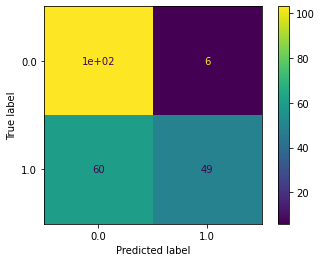

In [91]:
model7.fit(X_train_cet,y_train_cet)
plot_confusion_matrix(model7,X_cet,y_cet)

Text(0, 0.5, 'Model score')

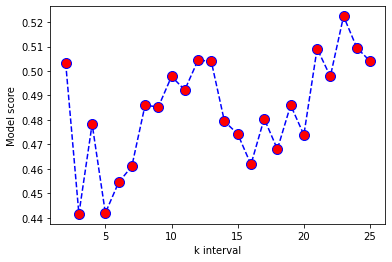

In [92]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
k_interval=list(range(2,26))
k_score=[]
for k in k_interval:
    baseline_model = KNeighborsClassifier(n_neighbors=k)
    cv_result=cross_validate(baseline_model,X_train_cet,y_train_cet,cv=10)
    k_score.append(cv_result['test_score'].mean())
plt.plot(k_interval,k_score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('k interval')
plt.ylabel('Model score')

## Random Forest
Grid search for 
Evaluate in 

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
#@interact(max_depth=5)
model8 = RandomForestClassifier(max_depth=20)

# 10-Fold Cross validation
print(np.mean(cross_val_score(model8, X_train_cet, y_train_cet, cv=10)))

#model8.fit(X_train_cet, y_train_cet)

0.5474264705882353


In [1]:
    param_grid = {
                     'n_estimators': [5, 10, 15, 20],
                     'max_depth': [2, 5, 7, 9],
                    'criterion': ['gini','entropy'],
                 }
    param_grid2 = {'bootstrap': [True, False],
     'max_depth': [10, 20, 30, 40, 50, None],
     'max_features': ['auto', 'sqrt'],
    'criterion': ['gini','entropy'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [10,20,50]}

In [81]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(model8, param_grid2, cv=10)
search.fit(X_train_cet, y_train_cet)
search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

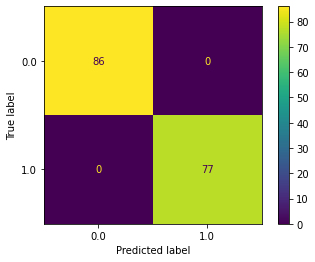

In [95]:
grid_model8=RandomForestClassifier(bootstrap= False,criterion= 'gini',max_depth=10,max_features='sqrt',min_samples_leaf= 1, min_samples_split= 5,n_estimators=10)
grid_model8.fit(X_train_cet, y_train_cet)
plot_confusion_matrix(grid_model8,X_train_cet, y_train_cet)

In [106]:
cv_results=cross_validate(grid_model8,X_train_cet,y_train_cet,cv=5)
cv_results['test_score'].mean()

0.5397727272727273

## XGbosst

In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model9 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model9.fit(X_train_cet, y_train_cet)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [61]:
#Grid search params
param_grid = {
                 'n_estimators': [2,3,4,5, 10, 15, 200],
                 'max_depth': [2, 5, 7, 9,20],
                # 'booster': ['gbtree','gblinear','dart'],
             }
grid_model9 = GridSearchCV(model8, param_grid, cv=10)
grid_model9.fit(X_train_cet, y_train_cet)
grid_model9.best_params_


{'max_depth': 7, 'n_estimators': 10}

In [67]:
model9 = XGBClassifier(use_label_encoder=False,max_depth=7,n_estimators=10, eval_metric='mlogloss',booster='dart')
grid_model9.fit(X_train_cet, y_train_cet)
y_pred = grid_model9.predict(X_test_cet)
accuracy = accuracy_score(y_test_cet, y_pred)
accuracy

0.5272727272727272

In [107]:
    cv_results=cross_validate(grid_model9,X_train_cet,y_train_cet,cv=5)
    cv_results['test_score'].mean()

0.4721590909090909

## Supervised learning - reduced DF (remove patience with high p)

In [118]:
clinical_df[['CET1_REST0','os_time_mo','ets_cat','orr1','predictedCMS',"pat_nr","skin_rash"]]

,CET1_REST0,os_time_mo,ets_cat,orr1,predictedCMS,pat_nr,skin_rash
0,0.0,50.398357,NaN,1.0,4.0,1,0.0
1,1.0,23.655031,NaN,0.0,NaN,2,0.0
2,1.0,19.121150,NaN,1.0,NaN,3,0.0
3,0.0,16.459959,0.0,1.0,2.0,4,0.0
4,0.0,14.817248,1.0,1.0,NaN,5,0.0
...,...,...,...,...,...,...,...
730,1.0,4.829569,NaN,0.0,3.0,896,0.0
731,0.0,14.587269,0.0,0.0,NaN,897,0.0
732,0.0,30.718686,NaN,0.0,NaN,898,0.0
733,0.0,31.737166,0.0,0.0,4.0,899,0.0


In [119]:
clinical_df[['CET1_REST0','os_time_mo','ets_cat','orr1','predictedCMS',"pat_nr","skin_rash"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CET1_REST0    735 non-null    float64
 1   os_time_mo    735 non-null    float64
 2   ets_cat       559 non-null    float64
 3   orr1          735 non-null    float64
 4   predictedCMS  404 non-null    float64
 5   pat_nr        735 non-null    int64  
 6   skin_rash     735 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 40.3 KB
